# Carregar pacotes

In [1]:
# Carregando pacotes necessários
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import os

# Configurando o caminho dos dados
try:
    data_path = os.path.dirname(os.path.abspath(__file__))  # Para scripts
except NameError:
    data_path = os.getcwd()  # Para notebooks

print(f"Diretório dos dados: {data_path}")

Diretório dos dados: /home/larissa/Documentos/UEL/Machine Learning/wine+quality


# Carregar o conjunto de dados

In [2]:
# Carregando o conjunto de dados
red_wine = pd.read_csv(os.path.join(data_path, "winequality-red.csv"), sep=";")
white_wine = pd.read_csv(os.path.join(data_path, "winequality-white.csv"), sep=";")

# Combinando os dois conjuntos e adicionando uma coluna para diferenciar os tipos
red_wine['type'] = 0  # 0 para vinho tinto
white_wine['type'] = 1  # 1 para vinho branco
wine_data = pd.concat([red_wine, white_wine], axis=0)

# Exibindo um resumo dos dados
print(wine_data.info())
print(wine_data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
coun

# Preparar os dados

(pré-processamento)

In [3]:
# Verificando os valores ausentes
print("Valores ausentes:\n", wine_data.isnull().sum())

# Separando features e alvo
X = wine_data.drop(columns=['quality', 'type'])
y = wine_data['quality']

# Normalizando os dados (opcional, mas pode melhorar a performance)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


Valores ausentes:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


# Método de avaliação

In [4]:
# Função para realizar subamostragem aleatória
def random_subsampling(model, X, y, n_splits=10):
    scores = {'accuracy': [], 'precision': [], 'recall': []}
    for _ in range(n_splits):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=np.random.randint(1000))
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        scores['accuracy'].append(accuracy_score(y_val, y_pred))
        scores['precision'].append(precision_score(y_val, y_pred, average='weighted'))
        scores['recall'].append(recall_score(y_val, y_pred, average='weighted'))
    return scores


# Geração e avaliação do modelo
- Etapa de treinamento
- Etapa de teste
- Decisão de parada treinamento
- Salvar o modelo

In [8]:
# Treinamento e avaliação usando Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_scores = random_subsampling(rf_model, X_train, y_train)

# Treinamento e avaliação usando Regressão Logística
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_scores = random_subsampling(lr_model, X_train, y_train)


/home/larissa/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/larissa/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/larissa/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/larissa/.local/lib/python3.8/site-packages/sklearn/metrics/_classifica

# Avaliação do desempenho dos modelos
- Usar métrica de desempenho
- Apresentar gráfico
- Comparar os dois métodos utilizados

Random Forest:
Acurácia Média: 0.6452747252747253
Precisão Média: 0.651113160930221
Revocação Média: 0.6452747252747253

Logistic Regression:
Acurácia Média: 0.5486446886446886
Precisão Média: 0.5108566417766977
Revocação Média: 0.5486446886446886


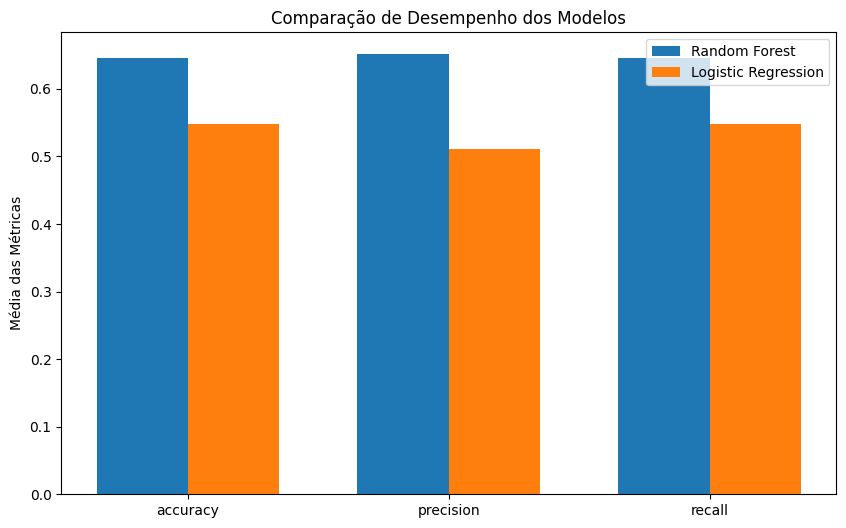

In [6]:
# Exibindo as médias das métricas para cada modelo
print("Random Forest:")
print("Acurácia Média:", np.mean(rf_scores['accuracy']))
print("Precisão Média:", np.mean(rf_scores['precision']))
print("Revocação Média:", np.mean(rf_scores['recall']))

print("\nLogistic Regression:")
print("Acurácia Média:", np.mean(lr_scores['accuracy']))
print("Precisão Média:", np.mean(lr_scores['precision']))
print("Revocação Média:", np.mean(lr_scores['recall']))

# Plotando comparações
metrics = ['accuracy', 'precision', 'recall']
rf_means = [np.mean(rf_scores[m]) for m in metrics]
lr_means = [np.mean(lr_scores[m]) for m in metrics]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, rf_means, width, label='Random Forest')
bar2 = ax.bar(x + width/2, lr_means, width, label='Logistic Regression')

ax.set_ylabel('Média das Métricas')
ax.set_title('Comparação de Desempenho dos Modelos')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()


In [7]:
import joblib

# Salvando o melhor modelo
joblib.dump(rf_model, os.path.join(data_path, "best_model.pkl"))
print("Modelo salvo em:", os.path.join(data_path, "best_model.pkl"))


Modelo salvo em: /home/larissa/Documentos/UEL/Machine Learning/wine+quality/best_model.pkl
